In [1]:
#!pip install jyquickhelper
#Pour la table des matières
from jyquickhelper import add_notebook_menu

#Pour les api et données requetables
import requests

####################################################Les packages nécessaires###################################################
import pandas as pd
# Import seaborn
import seaborn as sns
#default theme
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
################################################################################################################################

#Pour afficher toutes les colonnes des bases de données 
pd.set_option('display.max_columns', None)
add_notebook_menu()

In [ ]:
#Ajout de ligne

## <center>1. Importation des données</center>

In [2]:
#Racine principale de récupération des données
glob_path = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset="

### 1.2 Vœux de poursuite d'études et de réorientation dans l'enseignement supérieur et réponses des établissements



https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/information/

###### On a 12760 lignes d'individus et l'Api ne permet pas de récupérer plus de 10 000 lignes et donc on a troué comme astuce de récupérer selon le type de l'établissement avant de merger les bases


In [3]:
#Segmentation pour pouvoir tout récupérer car l'API n'autorise pas plus de 10 000 lignes 
type_etablissement = ["2_Lyc%C3%A9es", "1_Universit%C3%A9s", "3_Autres+formations"]


In [4]:
#Le lien de récupération
voeux_poursuite = glob_path+"fr-esr-parcoursup&rows=6020&sort=tri&facet=session&facet=contrat_etab&facet=cod_uai&facet=g_ea_lib_vx&facet=dep_lib&facet=region_etab_aff&facet=acad_mies&facet=select_form&facet=fili&facet=form_lib_voe_acc&facet=regr_forma&facet=fil_lib_voe_acc&facet=detail_forma&facet=tri&facet=cod_aff_form&q="


In [5]:
#Récupération selon le type d'établissement
data_etablissement = [requests.get(voeux_poursuite + type_etablissement[x]) for x in range(3)]

In [6]:
#Vérification
data_etablissement

[<Response [200]>, <Response [200]>, <Response [200]>]

In [7]:
#Conversion de json à pd.Dataframe
data_etablissement = [pd.json_normalize(x.json()['records'][:]) for x in data_etablissement ]

In [8]:
glob_data = pd.concat(data_etablissement)
glob_data.columns = [c.replace('fields.', '') for c in list(glob_data.columns) ]

### Fouille des données et Statistiques descriptives 

In [9]:
glob_data.shape[1]

120

In [10]:
df = glob_data.copy()


In [11]:
names = {'session' : 'session' ,
        'cod_uai' : 'Identifiant del_établissement' , 
        'g_ea_lib_vx' : 'Identifiant del_établissement' , 
        'dep' : 'code département al del_établisseme nt' , 
        'dep_lib' : 'département de l_établissement' , 
        'region_etab_aff' : 'Région de l_établissement' , 
        'acad_mies' : 'académie de l_établissement' , 
        'fili':'filière de formation très agrégée',
        'contrat_etab':'statut de l_établisseme nt de la filière de formation(public, privé…)', 
        'lib_for_voe_ins':'filière deformation', 
        'select_form':'select_fromat : prend 1 si la formation est sélective, 0 sinon',
        'lib_comp_voe_ins':'filière de formation détaillée', 
        'detail_forma':'filière de formationtrès détaillée', 
        'lien_form_psup':'lien de la formation sur la plateforme parcoursup', 
        'géolocalisation_ des_formations':'coordonnées gps de la formation', 
        'capa_fin':'capacité de l_établisseme nt parformation', 
        'voe_tot':'Effectif total des candidatspour une formation', 
        'voe_tot_f':'dont effectif des candidatespour une formation', 

  'nb_voe_pp' : 'Effectif total des candidats en phaseprincipale' ,  
  'nb_voe_pp_internat' : 'Effectif total des candidats ayant postulé en internat' ,  
  'nb_voe_pp_bg' : 'Effectif des candidats en terminale générale en phase principale' ,  
  'nb_voe_pp_bg_brs' : 'dont effectif des candidats boursiers en terminale générale en phase principale' ,  
  'nb_voe_pp_bt' : 'Effectif des candidats néo en terminale technologique en phase principale' ,  
  'nb_voe_pp_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e en phaseprincipale' ,  
  'nb_voe_pp_bp' : 'Effectif des candidats néo bacheliers en terminalepro en phase principale' ,  
  'nb_voe_pp_bp_brs' : 'dont effectif des candidats boursiers néo bacheliers en terminale pro en phaseprincipale' ,  
  'nb_voe_pp_at' : 'Effectif des autres candidats en phaseprincipale' ,  
  'nb_voe_pc' : 'Effectif total des candidats en phasecomplément aire' ,  
'nb_voe_pc_bg' : 'Effectif des candidats en terminale générale en' ,
  '' : 'phase complémentaire' ,  
  'nb_voe_pc_bt' : 'Effectif des candidats en terminale technologiqu e en phase complémentaire' ,  
  'nb_voe_pc_bp' : 'Effectif des candidats en terminale pro en phase complémentaire' ,  
  'nb_voe_pc_at' : 'Effectifs des autres candidats en phase complémentaire' ,  
  'nb_cla_pp' : 'Effectif total des candidats classés par l_établisseme nt en phaseprincipale' ,  
  'nb_cla_pc' : 'Effectif des candidats classés par l_établisseme nt en phase complémentaire' ,  
  'nb_cla_pp_internat' : 'Effectif des candidats classés par l_établisseme nt en internatcpgE' ,  
  'nb_cla_pp_pasinternat' : 'Effectif des candidats classés par l_établisseme nt hors internat(cpgE)' ,  
  'nb_cla_pp_bg' : 'Effectif des candidats en terminale générale classés parl_établisseme nt' ,  
  'nb_cla_pp_bg_brs' : 'dont effectif des candidats boursiers en terminale générale classés par l_établissement' ,  
  'nb_cla_pp_bt' : 'Effectif des candidats en terminale technologiqu e classés par l_établissement' ,  
  'nb_cla_pp_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e classés par l_établissement' ,  
  'nb_cla_pp_bp' : 'Effectif des candidats en terminale pro classés par l_établissement' ,  
  'nb_cla_pp_bp_brs' : 'dont effectif des candidats boursiers en terminale pro classés parl_établisseme nt' ,  
  'nb_cla_pp_at' : 'Effectif des autres candidats classés parl_établisseme nt' ,  
  'prop_tot' : 'Effectif total des candidats ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bg' : 'Effectif des candidats en terminale générale ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_bg_brs' : 'dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_bt' : 'Effectif des candidats en terminale technologiqu e ayant reçu une propositiond_admission' ,  
  '' : 'de la part de l_établissement' ,  
  'prop_tot_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bp' : 'Effectif des candidats en terminale professionne lle ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bp_brs' : 'dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_at' : 'Effectif des autres candidats ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'acc_tot' : 'Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis)' ,  
  'acc_tot_f' : 'dont effectif des candidates admises' ,  
  'acc_pp' : 'Effectif des admis en phase principale' ,  
  'acc_pc' : 'Effectif des admis en phase complémentaire' ,  
  'acc_internat' : 'dont effectif des admis en internat' ,  
  'acc_brs' : 'dont effectif des admis boursiers néo bacheliers' ,  
  'acc_debutpp' : 'dont effectif des admis ayant reçu leur proposition d_admission le 15 mai (ouverture pp)' ,  
  'acc_datebac' : 'dont effectif des admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin)' ,  
  'acc_finpp' : 'dont effectif des admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet)' ,  
  'acc_neobac' : 'Effectif des admis néobacheliers' ,  
  'acc_bg' : 'Effectif des admis néo bacheliers généraux' ,  
  'acc_bt' : 'Effectif des admis néo bacheliers technologiques' ,  
  'acc_bp' : 'Effectif des admis néo bacheliers professionnels' ,  
  'acc_at' : 'Effectif des autres candidats admis' ,  
  'acc_mention_non renseignee' : 'dont effectif des admis néo bacheliers sans information sur la mention au bac' ,  
  'acc_sansmention' : 'dont effectif des admis néo bacheliers sans mention au bac' ,  
  'acc_ab' : 'dont effectif des admis néo bacheliers avec mention assez Bien au bac' ,  
  'acc_b' : 'dont effectif des admis néo bacheliers avec mention Bien au bac' ,  
  'acc_tb' : 'dont effectif des admis néo bacheliers avec mention Très Bien au bac' ,  
  'acc_bg_mention' : 'Effectif des admis néo bacheliers généraux ayant eu une mention au bac' ,  
  'acc_bt_mention' : 'Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac' ,  
  'acc_bp_mention' : 'Effectif des admis néo bacheliers professionne ls ayant eu une mention au bac' ,  
  'acc_term' : 'dont effectif des admis néo bacheliers issus du même établissemen t (BTs/cpgE)' ,  
  'acc_term_f' : 'dont effectif des admises néo bachelières issues du même établissemen t (BTs/cpgE)' ,  
  'acc_aca_orig' : 'dont effectif des admis néo bacheliers issus de la même académie' ,  
  'acc_aca_orig_idf' : 'dont effectif des admis néo bacheliers issus de la même académie (paris/crétei l/versailles réunies)' ,  
  'pct_f' : '% ayant accepté selon le sexe.' ,
  'pct_aca_orig' : '% d_admis néo bacheliers issus de la même académie' ,  
  'pct_aca_orig_idf' : '% d_admis néo bacheliers issus de la même académie (paris/créteil/versailles réunies)' ,  
  'pct_etab_orig' : '% d_admis néo bacheliers issus du même établissemen t (BTs/cpgE)' ,  
  'pct_bours' : '% d_admis néo bacheliers boursiers' ,  
  'pct_acc_debutpp' : '% d_admis ayant reçu leur proposition d_admission le 15 mai (ouverturepp)' ,  
  'pct_acc_datebac' : '% d_admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin)' ,  
  'pct_acc_finpp' : '% d_admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet)' ,  
  'pct_neobac' : '% d_admis néobacheliers' ,  
  'pct_mention_nonrenseignee' : '% d_admis néo bacheliers sans information sur la mention au bac' ,  
  'pct_sansmention' : '% d_admis néo bacheliers sans mention au bac' ,  
  'pct_ab' : '% d_admis néo bacheliers avec mention assez Bien au bac' ,  
  'pct_b' : '% d_admis néo bacheliers avec mention Bien au bac' ,  
  'pct_tb' : '% d_admis néo bacheliers avec mention Très Bien au bac' ,  
  'pct_bg' : '% d_admis néo bacheliers généraux' ,  
  'pct_bg_mention' : 'dont % d_admis avec mention' ,  
  'pct_bt' : '% d_admis néo bacheliers technologiques' ,  
  'pct_bt_mention' : 'dont % d_admis avec mention' ,
  'pct_bp' : '% d_admis néo bacheliers professionnels' ,  
  'pct_bp_mention' : 'dont % d_admis avec mention' ,  
  'lib_grp1' : 'Regroupeme nt 1 effectué par les formations pour les classements' ,  
  'ran_grp1' : 'Rang du dernier appelé du groupe 1' ,  

  'lib_grp2' : 'Regroupeme nt 2 effectué par les formations pour les classements' ,  
  'ran_grp2' : 'Rang du dernier appelé du groupe 2' ,  
  'lib_grp3' : 'Regroupeme nt 3 effectué par les formations pour les classements' ,  
  'ran_grp3' : 'Rang du dernier appelé du groupe 3' ,  
  'lib_grp4' : 'Regroupeme nt 4 effectué par les formations pour les classements' ,  
  'ran_grp4' : 'Rang du dernier appelé du groupe 4' ,  
  'lib_grp5' : 'Regroupeme nt 5 effectué par les formations pour lesc classements' ,  
  'ran_grp5' : 'Rang du dernier appelé du groupe 5' ,  
  
}


In [12]:
df.rename(columns = names)

,datasetid,recordid,record_timestamp,Effectif des autres candidats en phaseprincipale,Effectif des candidats néo bacheliers en terminalepro en phase principale,Effectif des candidats en terminale générale en phase principale,% d_admis néo bacheliers sans mention au bac,fil_lib_voe_acc,dont effectif des admis boursiers néo bacheliers,Effectif des admis néo bacheliers généraux,tri,Effectif des admis néo bacheliers généraux ayant eu une mention au bac,session,form_lib_voe_acc,cod_aff_form,filière de formation très agrégée,lien de la formation sur la plateforme parcoursup,dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d_admission de la part de l_établissement,académie de l_établissement,taux_adm_psup_gen,"statut de l_établisseme nt de la filière de formation(public, privé…)",dont % d_admis avec mention,Rang du dernier appelé du groupe 3,dont effectif des admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet),Effectif des admis en phase complémentaire,Effectif des candidats en terminale générale classés parl_établisseme nt,Effectif des admis néo bacheliers technologiques,dont effectif des candidats boursiers en terminale technologiqu e classés par l_établissement,Effectif des candidats néo en terminale technologique en phase principale,dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d_admission de la part de l_établissement,taux_adm_psup_pro,% d_admis néo bacheliers issus de la même académie,Effectif des candidats en terminale technologiqu e ayant reçu une propositiond_admission,Effectif des admis en phase principale,Effectif total des candidatspour une formation,Effectif total des candidats en phaseprincipale,filière de formation détaillée,Identifiant del_établissement,% d_admis ayant reçu leur proposition d_admission le 15 mai (ouverturepp),code département al del_établisseme nt,Effectif des candidats en terminale professionne lle ayant reçu une proposition d_admission de la part del_établisseme nt,% d_admis néo bacheliers avec mention Très Bien au bac,dont effectif des candidats boursiers en terminale technologiqu e ayant reçu une proposition d_admission de la part del_établisseme nt,% d_admis néo bacheliers issus du même établissemen t (BTs/cpgE),% d_admis néo bacheliers sans information sur la mention au bac,dont effectif des admis néo bacheliers avec mention assez Bien au bac,dont effectif des admis néo bacheliers issus de la même académie,Identifiant del_établissement,% d_admis néo bacheliers avec mention assez Bien au bac,Effectif des candidats en terminale pro en phase complémentaire,% d_admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet),dont effectif des candidats boursiers en terminale générale en phase principale,Effectif des candidats en terminale pro classés par l_établissement,Rang du dernier appelé du groupe 1,% d_admis néo bacheliers généraux,% d_admis néo bacheliers boursiers,Effectifs des autres candidats en phase complémentaire,dont effectif des admis néo bacheliers issus de la même académie (paris/crétei l/versailles réunies),% ayant accepté selon le sexe.,Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac,Effectif total des candidats classés par l_établisseme nt en phaseprincipale,dont effectif des admis néo bacheliers issus du même établissemen t (BTs/cpgE),Effectif total des candidats ayant reçu une proposition d_admission de la part del_établisseme nt,Effectif des candidats en terminale technologiqu e en phase complémentaire,dont effectif des admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin),Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis),Région de l_établissement,dont effectif des candidats boursiers en terminale générale classés par l_établissement,% d_admis néo bacheliers technologiques,Effectif des candidats en terminale générale

In [13]:
##Modifier les indexes
df.set_index('g_ea_lib_vx',inplace=True)


In [14]:
df.select_dtypes('object').columns
#Certaines variables de types numeric enrégistrées comme catégorielles à corriger
df[['ran_grp2','ran_grp3', 'ran_grp4', 'ran_grp5','pct_etab_orig']] = df[['ran_grp2','ran_grp3', 'ran_grp4', 'ran_grp5','pct_etab_orig']].astype('float64', copy=True)
#Variables categorielles
df_c=df.select_dtypes('object')
#Variables numériques
df_n=df.select_dtypes('number')

In [15]:
stats=df_n.describe()

In [16]:
sum(df['nb_voe_pp_at'])

2842825

In [17]:
names = ['Session','Statut de l’établissement de la filière de formation (public, privé…)','Code UAI de l''établissement','Établissement','Code départemental de l’établissement','Département de l’établissement','Région de l’établissement','Académie de l’établissement','Sélectivité','Filière de formation très agrégée','Filière de formation détaillée','Filière de formation','Concours communs et banques d''épreuves','Filière de formation détaillée','Filière de formation très détaillée','Lien de la formation sur la plateforme Parcoursup','Coordonnées GPS de la formation','Capacité de l’établissement par formation','Effectif total des candidats pour une formation','Dont effectif des candidates pour une formation','Effectif total des candidats en phase principale','Dont effectif des candidats ayant postulé en internat','Effectif des candidats néo bacheliers généraux en phase principale','Dont effectif des candidats boursiers néo bacheliers généraux en phase principale','Effectif des candidats néo bacheliers technologiques en phase principale','Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale','Effectif des candidats néo bacheliers professionnels en phase principale','Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale','Effectif des autres candidats en phase principale','Effectif total des candidats en phase complémentaire','Effectif des candidats néo bacheliers généraux en phase complémentaire','Effectif des candidats néo bacheliers technologique en phase complémentaire','Effectif des candidats néo bacheliers professionnels en phase complémentaire','Effectifs des autres candidats en phase complémentaire','Effectif total des candidats classés par l’établissement en phase principale','Effectif des candidats classés par l’établissement en phase complémentaire','Effectif des candidats classés par l’établissement en internat (CPGE)','Effectif des candidats classés par l’établissement hors internat (CPGE)','Effectif des candidats néo bacheliers généraux classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement','Effectif des candidats néo bacheliers technologiques classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement','Effectif des candidats néo bacheliers professionnels classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement','Effectif des autres candidats classés par l’établissement','Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement','Effectif total des candidats ayant accepté la proposition de l’établissement (admis)','Dont effectif des candidates admises','Effectif des admis en phase principale','Effectif des admis en phase complémentaire','Dont effectif des admis ayant reçu leur proposition d’admission à l''ouverture de la procédure principale','Dont effectif des admis ayant reçu leur proposition d’admission avant le baccalauréat','Dont effectif des admis ayant reçu leur proposition d’admission avant la fin de la procédure principale','Dont effectif des admis en internat','Effectif des admis néo bacheliers technologiques ayant eu une mention au bac','Effectif des admis néo bacheliers professionnels ayant eu une mention au bac','Dont effectif des admis issus du même établissement (BTS/CPGE)','Dont effectif des admises issues du même établissement (BTS/CPGE)','Dont effectif des admis issus de la même académie','Dont effectif des admis issus de la même académie (Paris/Créteil/Versailles réunies)','% d’admis ayant reçu leur proposition d’admission à l''ouverture de la procédure principale','% d’admis ayant reçu leur proposition d’admission avant le baccalauréat','% d’admis ayant reçu leur proposition d’admission avant la fin de la procédure principale','% d’admis dont filles','% d’admis néo bacheliers issus de la même académie','% d’admis néo bacheliers issus de la même académie (Paris/Créteil/Versailles réunies)','% d’admis néo bacheliers issus du même établissement (BTS/CPGE)','% d’admis néo bacheliers boursiers','% d’admis néo bacheliers','% d’admis néo bacheliers sans information sur la mention au bac','% d’admis néo bacheliers sans mention au bac','% d’admis néo bacheliers avec mention Assez Bien au bac','% d’admis néo bacheliers avec mention Bien au bac','% d’admis néo bacheliers avec mention Très Bien au bac','% d’admis néo bacheliers généraux','Dont % d’admis avec mention','% d’admis néo bacheliers technologiques','Dont % d’admis avec mention','% d’admis néo bacheliers professionnels','Dont % d’admis avec mention','Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d’admission de la part de l’établissement','Effectif des candidats en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement','Effectif des candidats en terminale professionnelle ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d’admission de la part de l’établissement','Effectif des autres candidats ayant reçu une proposition d’admission de la part de l’établissement','Regroupement 1 effectué par les formations pour les classements','Rang du dernier appelé du groupe 1','Regroupement 2 effectué par les formations pour les classements','Rang du dernier appelé du groupe 2','Regroupement 3 effectué par les formations pour les classements','Rang du dernier appelé du groupe 3','Regroupement 4 effectué par les formations pour les classements','Rang du dernier appelé du groupe 4','Regroupement 5 effectué par les formations pour les classements','Rang du dernier appelé du groupe 5','Indicateur Parcoursup du taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le dernier classé)','Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation','Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation','Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation','tri']


In [18]:
len(names)

102

In [19]:
stats

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,acc_brs,acc_bg,acc_bg_mention,prop_tot_bp_brs,taux_adm_psup_gen,pct_bp_mention,ran_grp3,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,pct_acc_debutpp,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_etab_orig,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,acc_term,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,acc_term_f,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,ran_grp2,nb_voe_pc_bg,acc_bp,acc_b,pct_acc_datebac,taux_adm_psup_techno,nb_cla_pp_internat,nb_voe_pp_internat,acc_internat,nb_cla_pp_pasinternat,ran_grp4,ran_grp5
count,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,3847.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12695.000000,12760.000000,12601.000000,12760.000000,6012.000000,12601.000000,12760.000000,12760.000000,12601.000000,12760.000000,12695.000000,12760.000000,12760.000000,12526.000000,12601.000000,12601.000000,12760.000000,12760.000000,12695.000000,12760.000000,12760.000000,6020.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12759.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12601.000000,12760.000000,6020.000000,12695.000000,12601.000000,12760.000000,12760.000000,12601.000000,12526.000000,12601.000000,12760.000000,5965.000000,12760.000000,12760.000000,12760.000000,12695.000000,11698.000000,847.000000,847.000000,847.000000,847.000000,14.000000,14.000000
mean,222.791928,63.848511,380.880251,29.845946,9.911677,26.632053,19.522884,7.386991,50.230894,17.698738,54.006499,46.761599,4.731740,309.672179,8.313636,25.545925,127.427743,26.056583,21.406309,72.646146,37.063323,47.670063,829.426646,794.948433,26.037591,18.408777,11.812738,11.002743,22.422136,0.445230,13.108307,28.723041,34.242406,3.969514,87.773350,62.047414,44.077743,395.533929,48.605589,26.916732,17.985345,31.516536,50.492940,5.385423,592.058229,4.650997,267.417320,5.537539,40.452508,52.797179,49.965517,27.921273,154.123433,38.856270,0.185188,26.302429,3.812774,11.024138,5.837226,57.821944,58.946156,12.865361,148.965517,29.352351,469.855251,39.930486,34.478213,34.332666,23.473138,14.181191,1.762126,76.219605,78.345634,12.736364,17.455016,23.653667,52.202698,17.677300,89.342790,81.052976,6.985815,4.984796,9.775549,75.135028,27.563173,91.135773,471.963400,12.308146,514.367178,1493.285714,1532.000000
std,463.296751,107.427396,810.847901,23.133849,17.872469,63.401771,50.923177,12.106941,33.763627,21.309215,235.892865,78.710696,15.358778,679.835142,11.331093,45.854514,198.522070,53.934757,23.574079,25.279103,50.486630,82.361416,1232.570749,1233.402317,21.796236,26.003716,19.392675,17.147422,20.761732,2.395116,23.519577,52.777244,17.506371,15.826651,15.115209,124.365393,78.423788,911.741640,36.635409,17.840888,46.728150,58.106418,29.645013,8.329283,1027.111384,4.751540,411.067324,23.739402,71.776210,86.916216,112.119944,23.056878,318.810122,67.687169,0.765743,48.646634,5.095066,23.191057,21.609167,108.581301,108.073233,25.589412,374.374974,58.164161,849.043786,69.516487,90.642315,34.195044,26.681943,33.569280,2.645951,20.066111,21.380067,42.013453,34.260101,16.937644

In [20]:
#Valeurs manquantes ?
df.isna().sum().sort_values(ascending=False)
missings = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
missings.rename(columns = {0 : 'Effectif'}, inplace = True)
missings['Vars'] = missings.index
missings.reset_index(drop=True, inplace=True)

In [21]:
missings['Effectif']=missings['Effectif']/glob_data.shape[0]*100
missings.rename(columns = {'Effectif' : 'Pourcentage de valeurs manquantes'}, inplace = True)

Text(0.5, 1.0, 'Pourcentage (%) des valeurs manquantes pour les variables de la base')

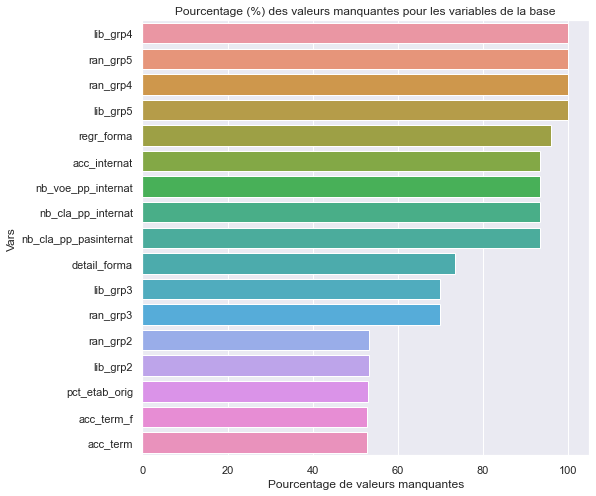

In [22]:
plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Pourcentage de valeurs manquantes", y='Vars', data=missings[missings['Pourcentage de valeurs manquantes']>20])
plt.title('Pourcentage (%) des valeurs manquantes pour les variables de la base')


In [23]:
vars_50 = list(missings[missings['Pourcentage de valeurs manquantes']<50]['Vars'])
len(vars_50)

102

In [24]:
#1. Méthodes graphiques : Box-plot, nuage de points, histogrammes...

In [25]:
#histogramme
def graph(data):
    for colonne in data.columns:
        print('***************************************************************************')
        print('             :------------',colonne,'------------:')
        print('***************************************************************************')
        df[colonne].hist()
        plt.show()

***************************************************************************
             :------------ nb_voe_pp_at ------------:
***************************************************************************


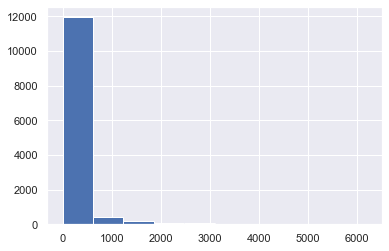

***************************************************************************
             :------------ nb_voe_pp_bp ------------:
***************************************************************************


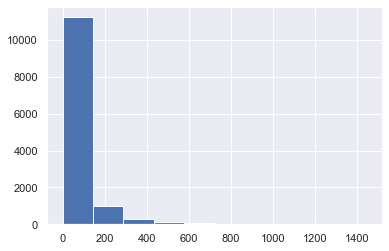

***************************************************************************
             :------------ nb_voe_pp_bg ------------:
***************************************************************************


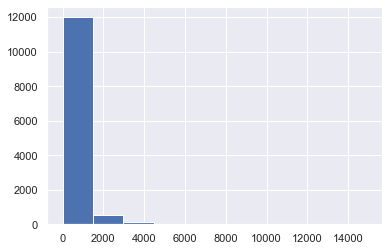

***************************************************************************
             :------------ pct_sansmention ------------:
***************************************************************************


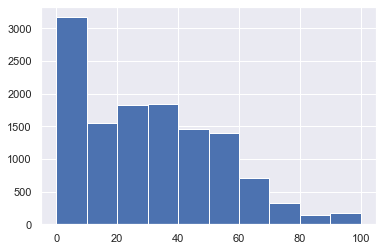

***************************************************************************
             :------------ acc_brs ------------:
***************************************************************************


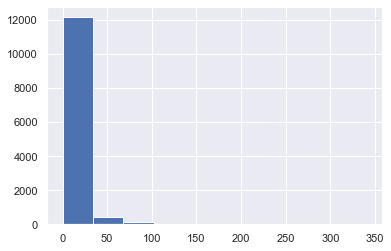

***************************************************************************
             :------------ acc_bg ------------:
***************************************************************************


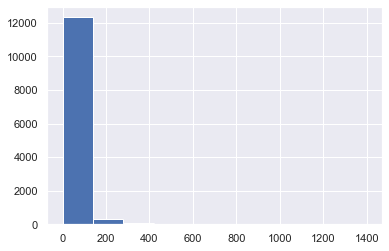

***************************************************************************
             :------------ acc_bg_mention ------------:
***************************************************************************


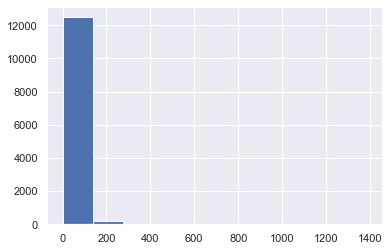

***************************************************************************
             :------------ prop_tot_bp_brs ------------:
***************************************************************************


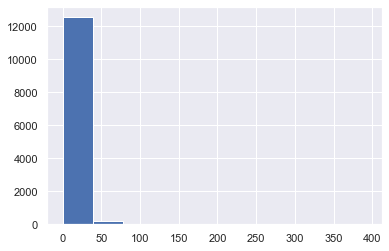

***************************************************************************
             :------------ taux_adm_psup_gen ------------:
***************************************************************************


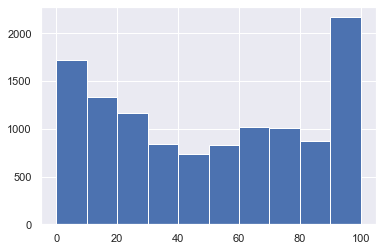

***************************************************************************
             :------------ pct_bp_mention ------------:
***************************************************************************


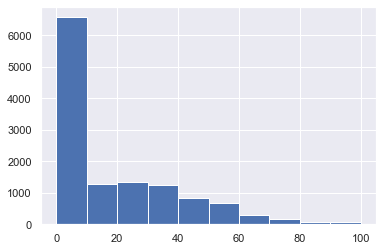

***************************************************************************
             :------------ ran_grp3 ------------:
***************************************************************************


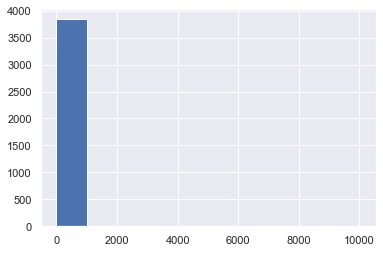

***************************************************************************
             :------------ acc_finpp ------------:
***************************************************************************


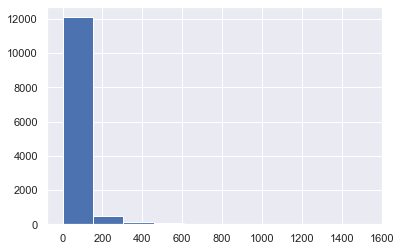

***************************************************************************
             :------------ acc_pc ------------:
***************************************************************************


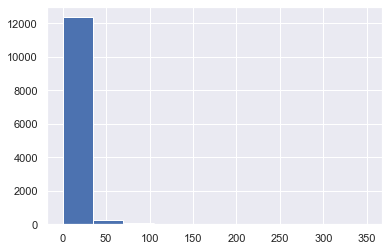

***************************************************************************
             :------------ nb_cla_pp_bg ------------:
***************************************************************************


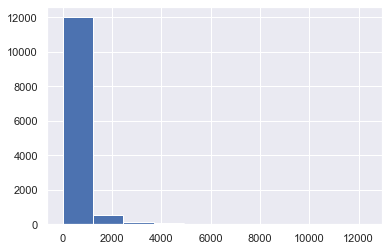

***************************************************************************
             :------------ acc_bt ------------:
***************************************************************************


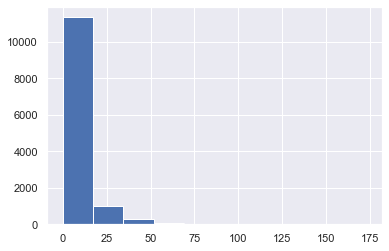

***************************************************************************
             :------------ nb_cla_pp_bt_brs ------------:
***************************************************************************


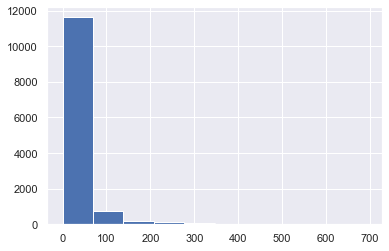

***************************************************************************
             :------------ nb_voe_pp_bt ------------:
***************************************************************************


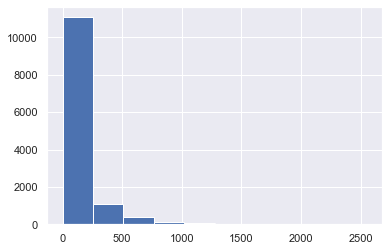

***************************************************************************
             :------------ prop_tot_bg_brs ------------:
***************************************************************************


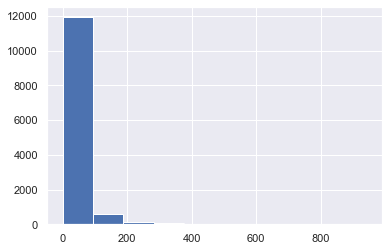

***************************************************************************
             :------------ taux_adm_psup_pro ------------:
***************************************************************************


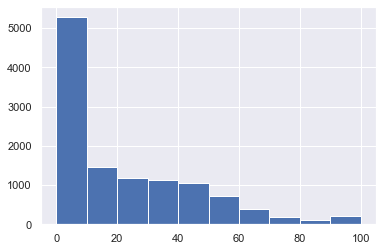

***************************************************************************
             :------------ pct_aca_orig ------------:
***************************************************************************


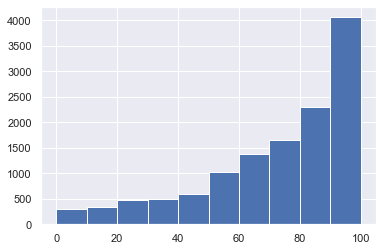

***************************************************************************
             :------------ prop_tot_bt ------------:
***************************************************************************


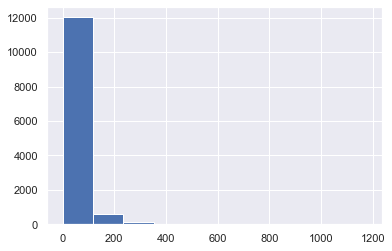

***************************************************************************
             :------------ acc_pp ------------:
***************************************************************************


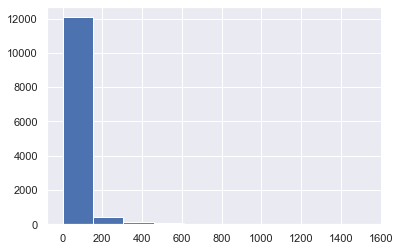

***************************************************************************
             :------------ voe_tot ------------:
***************************************************************************


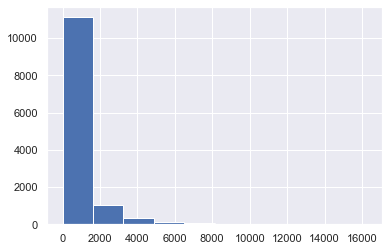

***************************************************************************
             :------------ nb_voe_pp ------------:
***************************************************************************


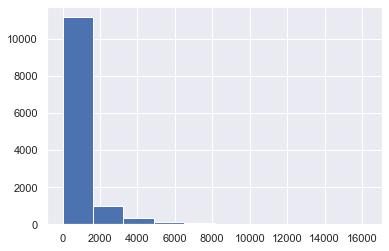

***************************************************************************
             :------------ pct_acc_debutpp ------------:
***************************************************************************


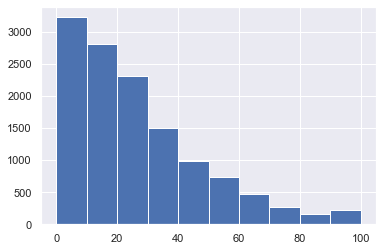

***************************************************************************
             :------------ prop_tot_bp ------------:
***************************************************************************


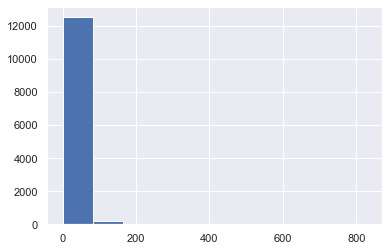

***************************************************************************
             :------------ pct_tb ------------:
***************************************************************************


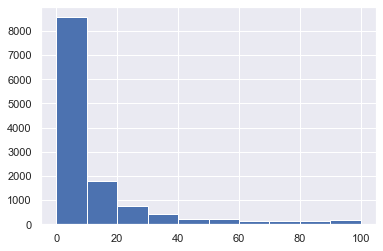

***************************************************************************
             :------------ prop_tot_bt_brs ------------:
***************************************************************************


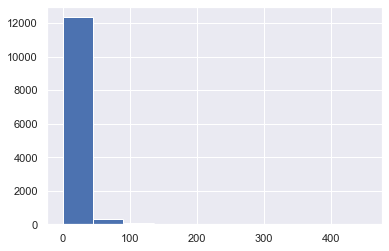

***************************************************************************
             :------------ pct_etab_orig ------------:
***************************************************************************


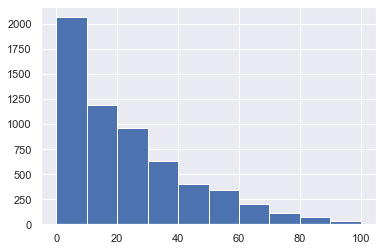

***************************************************************************
             :------------ pct_mention_nonrenseignee ------------:
***************************************************************************


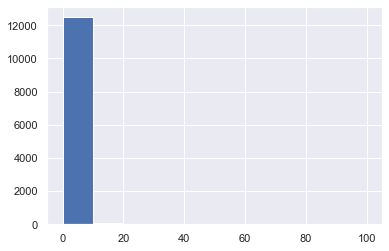

***************************************************************************
             :------------ acc_ab ------------:
***************************************************************************


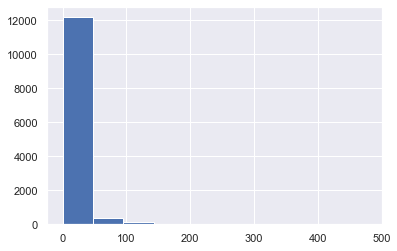

***************************************************************************
             :------------ acc_aca_orig ------------:
***************************************************************************


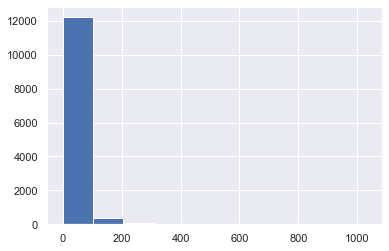

***************************************************************************
             :------------ pct_ab ------------:
***************************************************************************


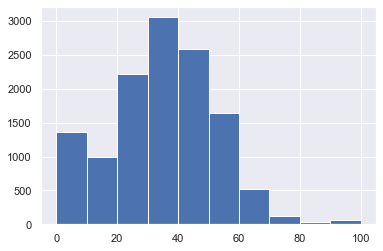

***************************************************************************
             :------------ nb_voe_pc_bp ------------:
***************************************************************************


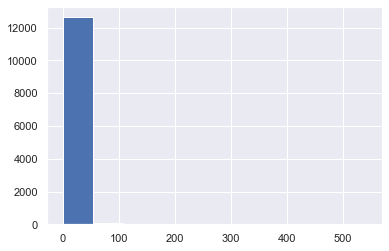

***************************************************************************
             :------------ pct_acc_finpp ------------:
***************************************************************************


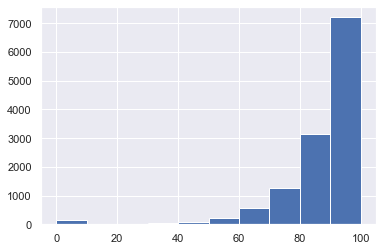

***************************************************************************
             :------------ nb_voe_pp_bg_brs ------------:
***************************************************************************


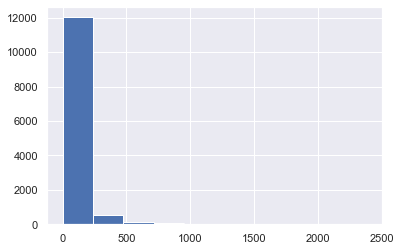

***************************************************************************
             :------------ nb_cla_pp_bp ------------:
***************************************************************************


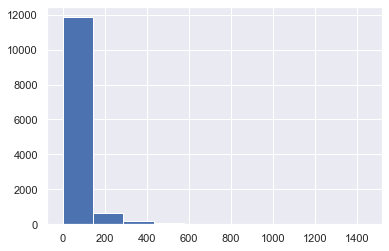

***************************************************************************
             :------------ ran_grp1 ------------:
***************************************************************************


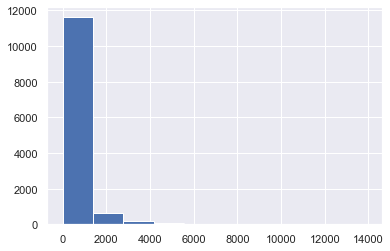

***************************************************************************
             :------------ pct_bg ------------:
***************************************************************************


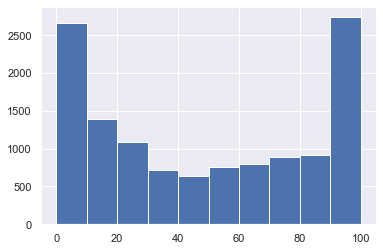

***************************************************************************
             :------------ pct_bours ------------:
***************************************************************************


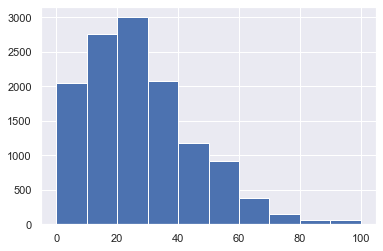

***************************************************************************
             :------------ nb_voe_pc_at ------------:
***************************************************************************


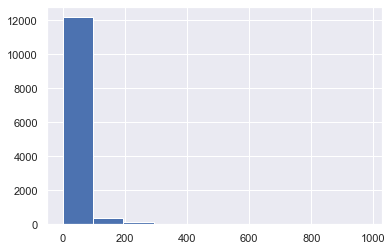

***************************************************************************
             :------------ acc_aca_orig_idf ------------:
***************************************************************************


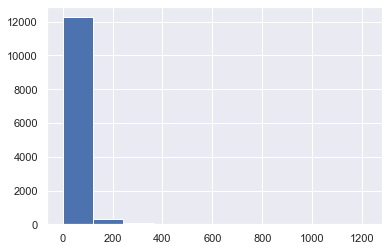

***************************************************************************
             :------------ pct_f ------------:
***************************************************************************


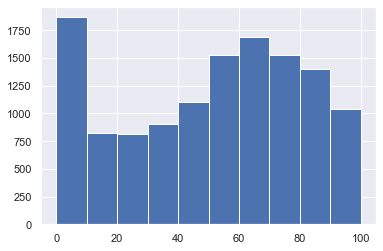

***************************************************************************
             :------------ acc_bt_mention ------------:
***************************************************************************


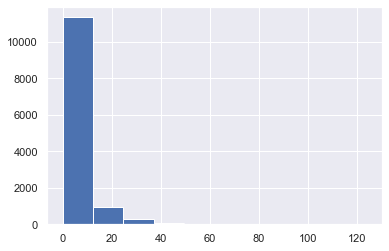

***************************************************************************
             :------------ nb_cla_pp ------------:
***************************************************************************


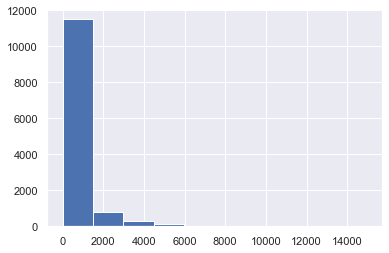

***************************************************************************
             :------------ acc_term ------------:
***************************************************************************


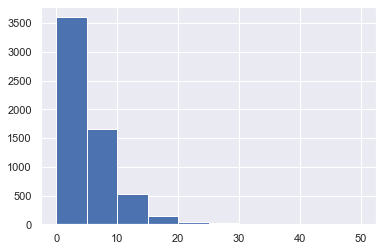

***************************************************************************
             :------------ prop_tot ------------:
***************************************************************************


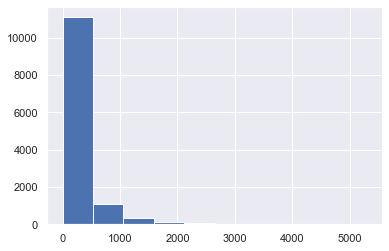

***************************************************************************
             :------------ nb_voe_pc_bt ------------:
***************************************************************************


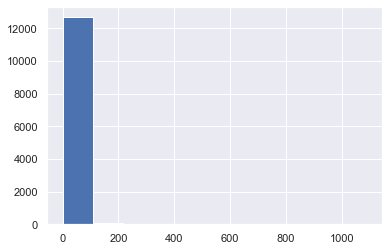

***************************************************************************
             :------------ acc_datebac ------------:
***************************************************************************


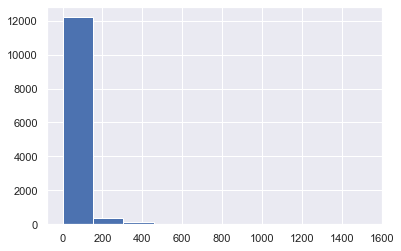

***************************************************************************
             :------------ acc_tot ------------:
***************************************************************************


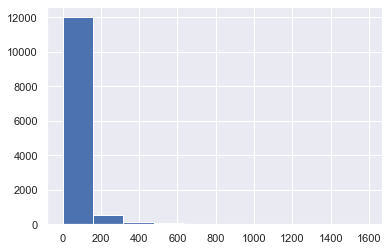

***************************************************************************
             :------------ nb_cla_pp_bg_brs ------------:
***************************************************************************


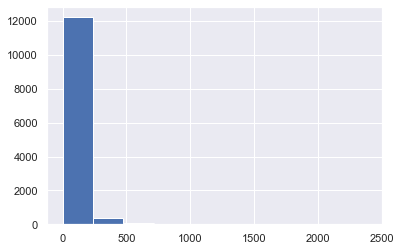

***************************************************************************
             :------------ pct_bt ------------:
***************************************************************************


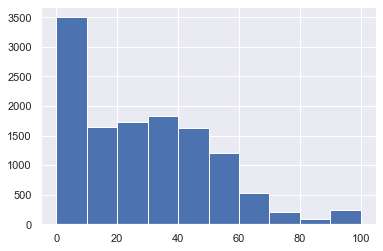

***************************************************************************
             :------------ prop_tot_bg ------------:
***************************************************************************


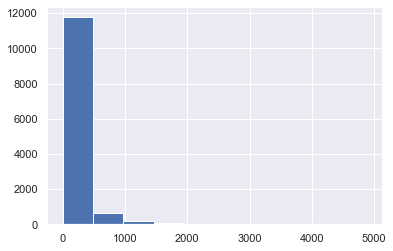

***************************************************************************
             :------------ nb_voe_pp_bt_brs ------------:
***************************************************************************


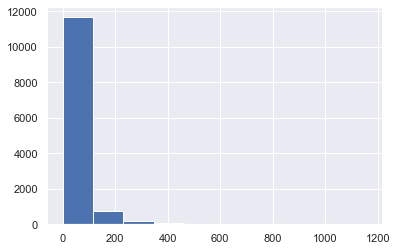

***************************************************************************
             :------------ acc_mention_nonrenseignee ------------:
***************************************************************************


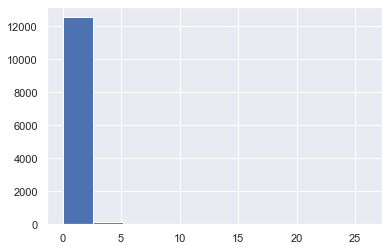

***************************************************************************
             :------------ nb_voe_pp_bp_brs ------------:
***************************************************************************


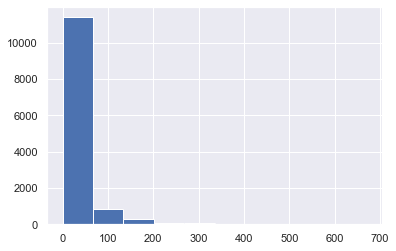

***************************************************************************
             :------------ acc_bp_mention ------------:
***************************************************************************


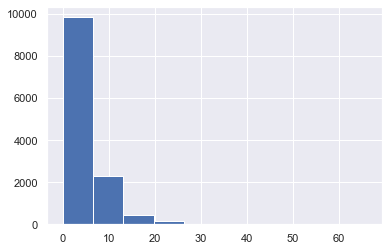

***************************************************************************
             :------------ acc_sansmention ------------:
***************************************************************************


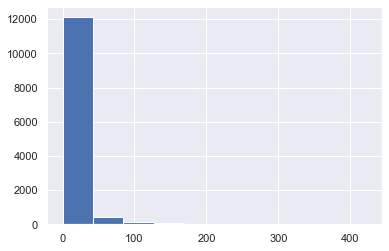

***************************************************************************
             :------------ acc_tb ------------:
***************************************************************************


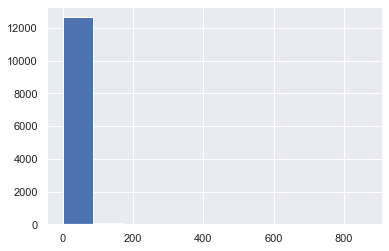

***************************************************************************
             :------------ prop_tot_at ------------:
***************************************************************************


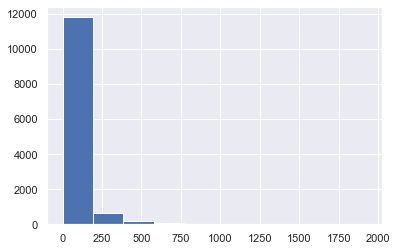

***************************************************************************
             :------------ capa_fin ------------:
***************************************************************************


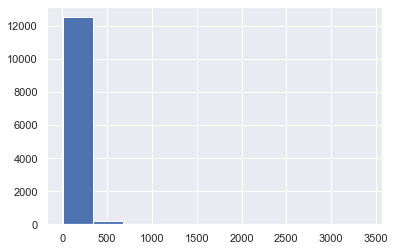

***************************************************************************
             :------------ acc_at ------------:
***************************************************************************


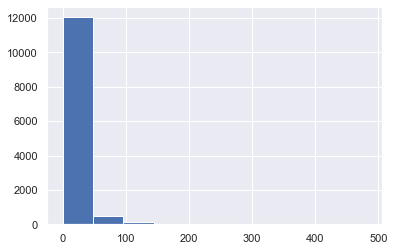

***************************************************************************
             :------------ nb_cla_pp_at ------------:
***************************************************************************


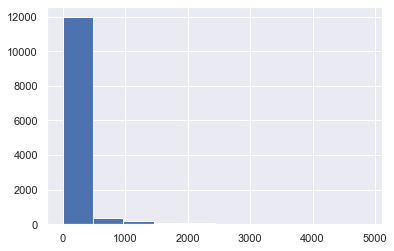

***************************************************************************
             :------------ acc_tot_f ------------:
***************************************************************************


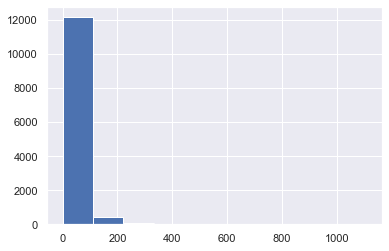

***************************************************************************
             :------------ voe_tot_f ------------:
***************************************************************************


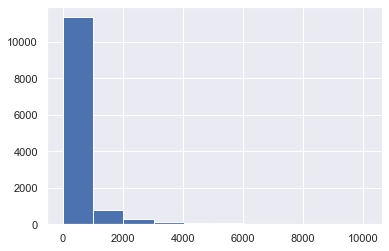

***************************************************************************
             :------------ acc_neobac ------------:
***************************************************************************


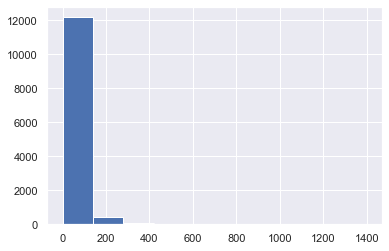

***************************************************************************
             :------------ nb_voe_pc ------------:
***************************************************************************


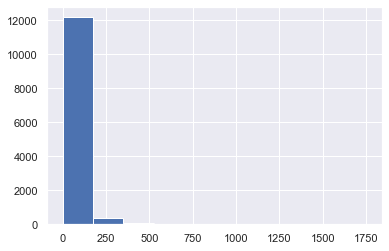

***************************************************************************
             :------------ pct_bg_mention ------------:
***************************************************************************


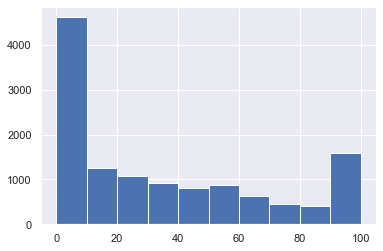

***************************************************************************
             :------------ pct_bp ------------:
***************************************************************************


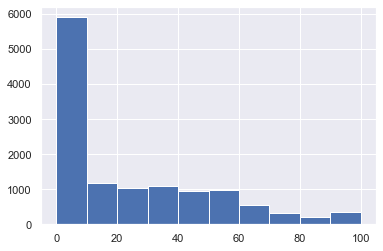

***************************************************************************
             :------------ acc_debutpp ------------:
***************************************************************************


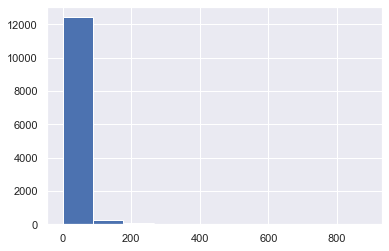

***************************************************************************
             :------------ acc_term_f ------------:
***************************************************************************


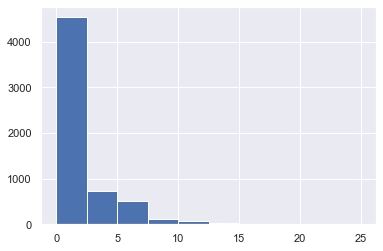

***************************************************************************
             :------------ pct_neobac ------------:
***************************************************************************


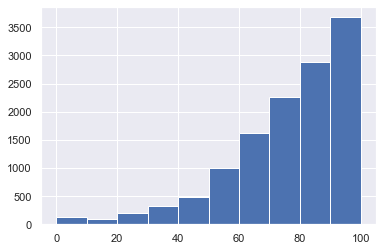

***************************************************************************
             :------------ pct_aca_orig_idf ------------:
***************************************************************************


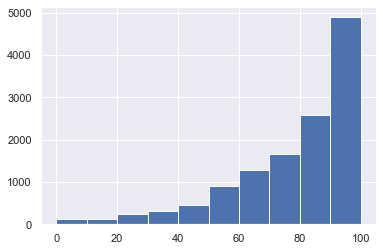

***************************************************************************
             :------------ nb_cla_pc ------------:
***************************************************************************


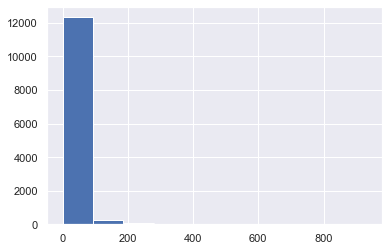

***************************************************************************
             :------------ nb_cla_pp_bp_brs ------------:
***************************************************************************


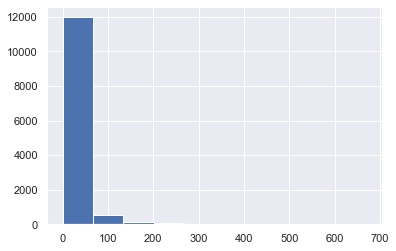

***************************************************************************
             :------------ pct_b ------------:
***************************************************************************


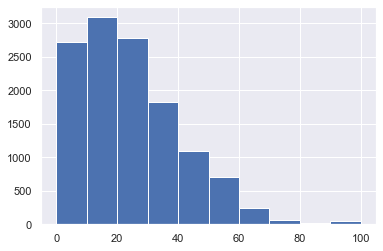

***************************************************************************
             :------------ taux_adm_psup ------------:
***************************************************************************


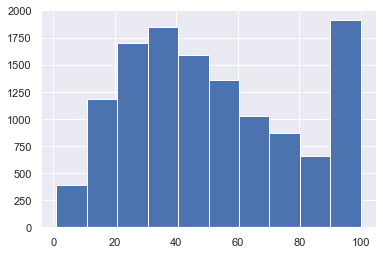

***************************************************************************
             :------------ pct_bt_mention ------------:
***************************************************************************


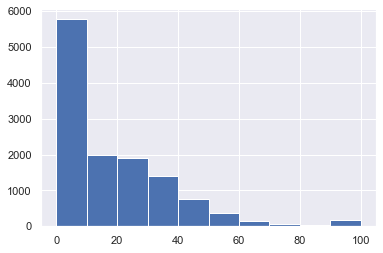

***************************************************************************
             :------------ nb_cla_pp_bt ------------:
***************************************************************************


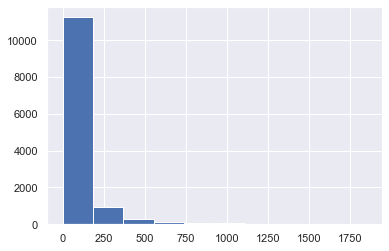

***************************************************************************
             :------------ ran_grp2 ------------:
***************************************************************************


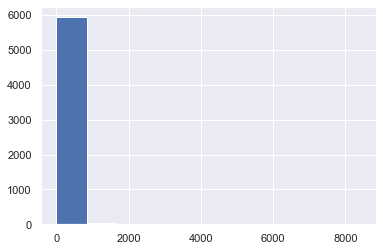

***************************************************************************
             :------------ nb_voe_pc_bg ------------:
***************************************************************************


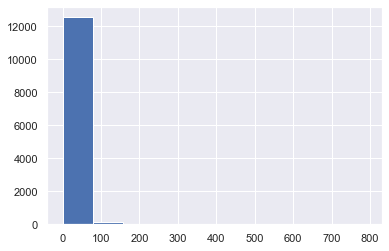

***************************************************************************
             :------------ acc_bp ------------:
***************************************************************************


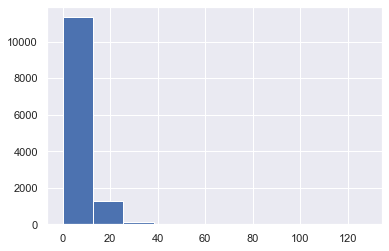

***************************************************************************
             :------------ acc_b ------------:
***************************************************************************


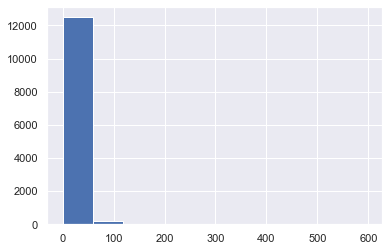

***************************************************************************
             :------------ pct_acc_datebac ------------:
***************************************************************************


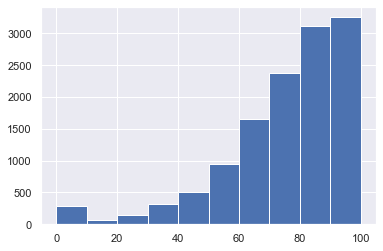

***************************************************************************
             :------------ taux_adm_psup_techno ------------:
***************************************************************************


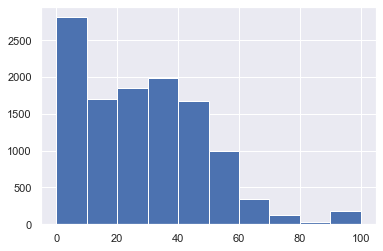

***************************************************************************
             :------------ nb_cla_pp_internat ------------:
***************************************************************************


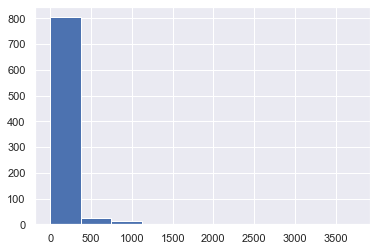

***************************************************************************
             :------------ nb_voe_pp_internat ------------:
***************************************************************************


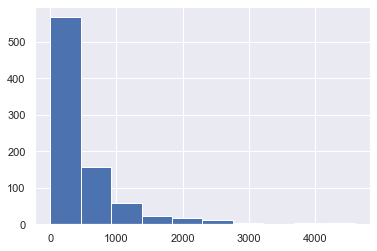

***************************************************************************
             :------------ acc_internat ------------:
***************************************************************************


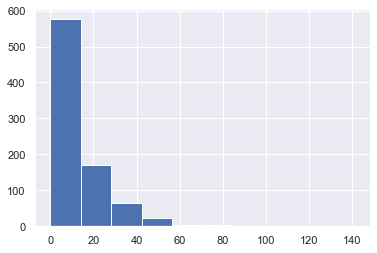

***************************************************************************
             :------------ nb_cla_pp_pasinternat ------------:
***************************************************************************


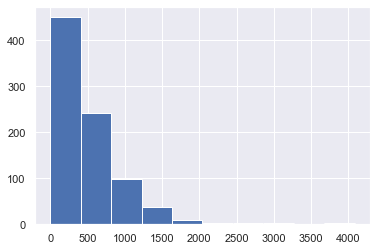

***************************************************************************
             :------------ ran_grp4 ------------:
***************************************************************************


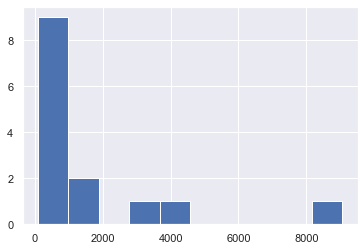

***************************************************************************
             :------------ ran_grp5 ------------:
***************************************************************************


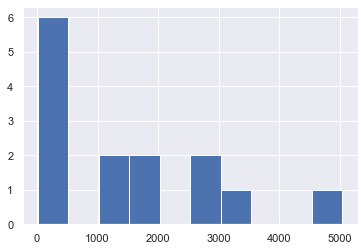

In [26]:
graph(df_n)

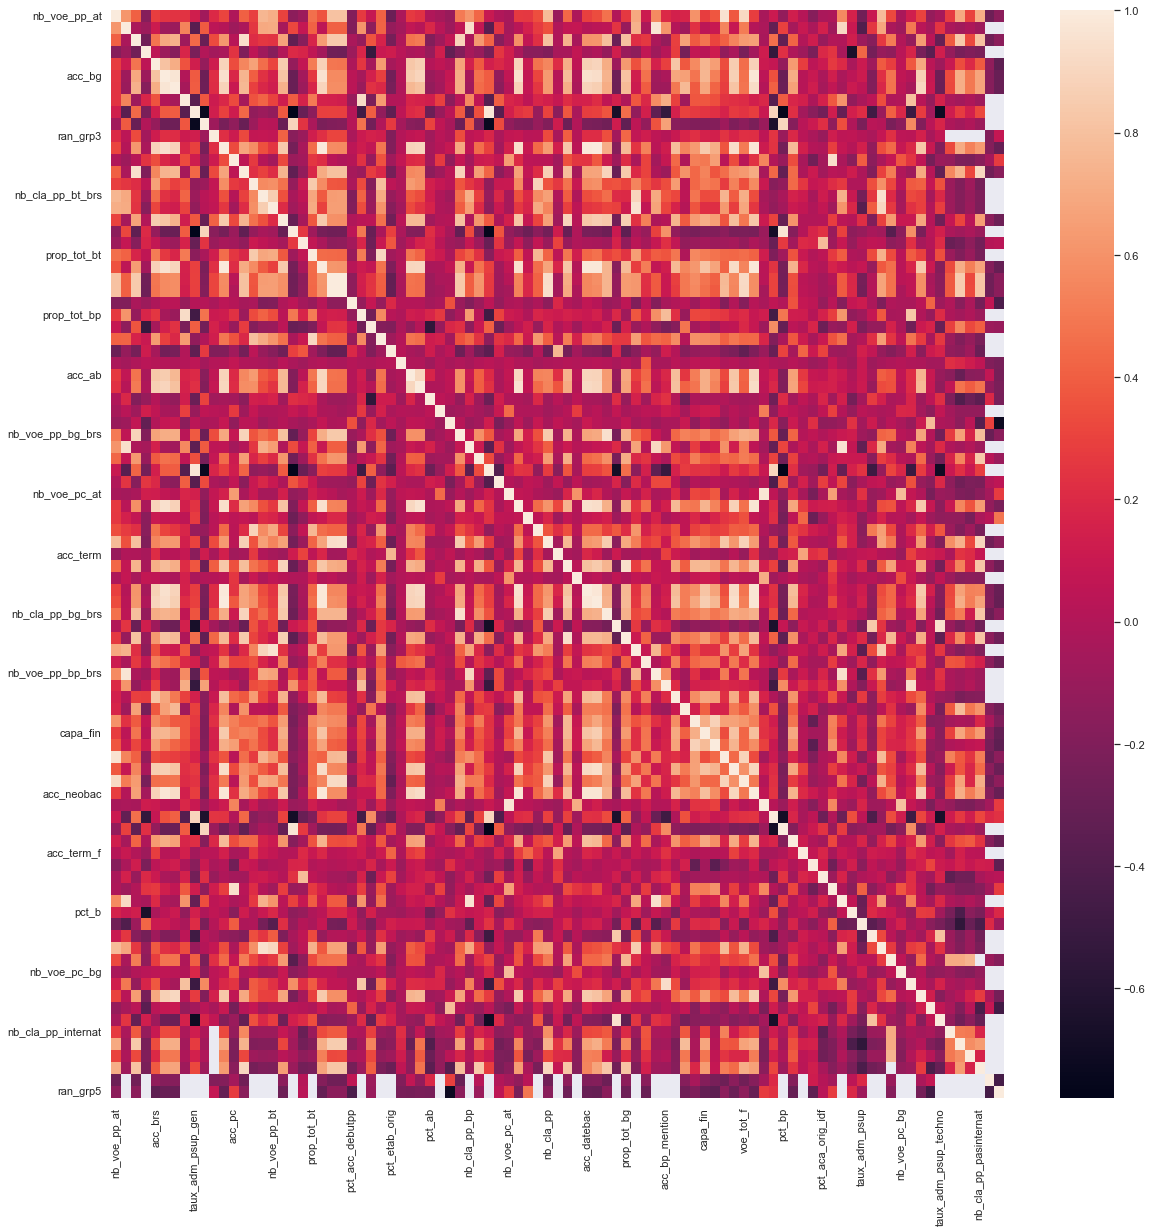

In [27]:
###Corrélation_Matrice
corrMatrix = df_n.corr()
sns.heatmap(corrMatrix, annot=False)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('Matrice_Correlation.png')

In [1]:
#!pip install "pandas-profiling-3.1.0.tar.gz" --user
#!pip uninstall pandas-profiling 

In [2]:
## Statistiques descriptives
#import pandas_profiling as pp



#rapport = pp.ProfileReport(glob_data, title='Statistiques descriptives', explorative=True)
#rapport.to_widgets()
#rapport.to_notebook_iframe()


In [ ]:
pp.ProfileReport()

In [ ]:
#!pip install autoviz --user
#!pip install emoji
!pip install dtale --user

In [ ]:
import dtale
import pandas as pd
d = dtale.show(df)
d.open_browser()

In [ ]:
sns.pairplot(df[:10])

In [ ]:
df.plot(kind=’box’, subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20), color=’deeppink’)

In [ ]:
mask = np.tril(df1.corr())
sns.heatmap(df1.corr(), fmt=’.1g’, annot = True, cmap= ‘cool’, mask=mask)

In [ ]:
#sns.catplot(data=glob_data[:], kind="swarm", x="contrat_etab", y="acc_tot", hue="select_form")


In [ ]:
!pip install pandas-profiling --user


In [ ]:
### STATISTIQUES

In [ ]:
## Effectif total des candidats pour une formation : voe_tot

In [ ]:
#selon le sexe

df['voe_tot_%_filles'] = 100*df['voe_tot_f']/df['voe_tot']

In [ ]:
df['voe_tot_%_filles'].describe()

In [ ]:
df['g_ea_lib_vx'][df['voe_tot_%_filles'] == 0]

In [ ]:
sns.barplot(x="voe_tot",  y="tri", data=df, ci=None)


In [ ]:
sns.barplot(x="voe_tot_f",  y="tri", data=df, ci=None)

In [ ]:
data = df[['g_ea_lib_vx','voe_tot',  'voe_tot_%_filles']].melt('g_ea_lib_vx', var_name='Type', value_name='effectif')

In [ ]:
li = list(df['voe_tot']) + list(df['voe_tot_f'])

In [ ]:
#create DataFrame
df_p = pd.DataFrame({'Valeurs':list(df['voe_tot']) + list(df['voe_tot_f']),
                     
                   'Tri': list(df['tri'])+ list(df['tri'])
                     ,
                     
                   'Iden':['Total']*len(df)+ ['Filles']*len(df)
                               })

In [ ]:
df_p

In [ ]:
sns.barplot(x="Valeurs",  y="Tri", data=df_p, ci=None, hue = 'Iden')

In [ ]:
df["filles"] = df['voe_tot_f']
df["garcons"] = df['voe_tot'] - df['voe_tot_f']
hom = fem = df[['tri','garcons']].groupby('tri').sum()
fem = df[['tri','filles']].groupby('tri').sum()

In [ ]:
base = pd.concat([hom,fem],axis = 1)
base.reset_index(inplace = True)

In [ ]:
base['garcons'] = 100*base['garcons']/(base['garcons'] + base['filles'])

In [ ]:
base['filles'] =100- base['garcons']

In [ ]:
base_ =base.melt('tri', var_name='Sexe', value_name= "Valeurs")
base_

In [ ]:
plt.subplots(figsize=(12, 5))
sx = sns.barplot(x="Valeurs",  y="tri", data=base_, ci=None, hue = 'Sexe')
x_labels = base_['Valeurs']
sx.set 

### 1.3 INSERTION PROFESSIONNEL



https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset=fr-esr-insertion_professionnelle-lp&q=&rows=1500&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018

In [ ]:
insertion = glob_path + "fr-esr-insertion_professionnelle-"
niveau = ["lp", "master"]
complement = "&q=&rows=1500&sort=-annee&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018"

In [ ]:
#Récupération selon le niveau
data_insertion = [requests.get(insertion + niveau[x] + complement) for x in range(2)]

In [ ]:
#Conversion de json à pd.Dataframe
data_insertion = [pd.json_normalize(x.json()['records'][:]) for x in data_insertion ]

In [ ]:
###Les données selon le niveau sont identifiées par la varibale datsetid

In [ ]:
data_insertion[0].shape

In [ ]:
data_insertion[1].shape

In [ ]:
glob_data_insertion = pd.concat(data_insertion)
glob_data_insertion.columns = [c.replace('fields.', '') for c in list(glob_data_insertion.columns) ]

In [ ]:
glob_data_insertion.head()

# ---------------------------------------------KHARIRATOU---------------------------------------------

In [170]:
df = glob_data_insertion.copy()

In [37]:
import seaborn as sns

In [81]:
import numpy as np

In [91]:
df['na']=np.nan

In [92]:
df['na']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1495   NaN
1496   NaN
1497   NaN
1498   NaN
1499   NaN
Name: na, Length: 2932, dtype: float64

In [119]:
df[df['taux_dinsertion']=='ns']

,datasetid,recordid,record_timestamp,discipline,salaire_brut_annuel_estime,salaire_net_mensuel_regional_3eme_quartile,salaire_net_mensuel_median_regional,cle_disc,taux_de_reponse,etablissementactuel,emplois_cadre_ou_professions_intermediaires,taux_dinsertion,emplois_exterieurs_a_la_region_de_luniversite,emplois_stables,diplome,salaire_net_median_des_emplois_a_temps_plein,poids_de_la_discipline,taux_de_chomage_regional,code_du_domaine,emplois_a_temps_plein,code_de_la_discipline,de_diplomes_boursiers,academie,numero_de_l_etablissement,domaine,nombre_de_reponses,femmes,salaire_net_mensuel_regional_1er_quartile,cle_etab,emplois_cadre,situation,annee,id_paysage,etablissement,code_de_l_academie,remarque
4,fr-esr-insertion_professionnelle-lp,8e7f79b211b5071c5c9faf34a25cc5e4d51b4bd7,2021-12-15T22:16:37.978000+00:00,"Lettres, langues, arts",ns,2240,1860,disc06_18,63,Université Côte d'Azur (UCA),ns,ns,ns,ns,LICENCE PRO,ns,1,9,LLA,ns,disc06,14,Nice,0060931E,"Lettres, langues, arts",3,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
5,fr-esr-insertion_professionnelle-lp,3b9e4979266933aba7b678358279f13dcb23c78f,2021-12-15T22:16:37.978000+00:00,Information communication,ns,2240,1860,disc10_18,67,Université Côte d'Azur (UCA),ns,ns,ns,ns,LICENCE PRO,ns,3,9,SHS,ns,disc10,14,Nice,0060931E,Sciences humaines et sociales,6,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
8,fr-esr-insertion_professionnelle-lp,7f46dcdcfba1946516d204152904657acd72517b,2021-12-15T22:16:37.978000+00:00,Sciences de la vie et de la terre,ns,2240,1860,disc13_30,77,Université Côte d'Azur (UCA),ns,ns,ns,ns,LICENCE PRO,ns,4,9,STS,ns,disc13,14,Nice,0060931E,"Sciences, technologies et santé",8,ns,1410,Nice - Sophia-Antipolis_30,ns,30 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
9,fr-esr-insertion_professionnelle-lp,fb039b7448a68a7ab3fab8859eca3ab91829f3ba,2021-12-15T22:16:37.978000+00:00,Sciences fondamentales,ns,2240,1860,disc14_18,75,Université Côte d'Azur (UCA),ns,ns,ns,ns,LICENCE PRO,ns,5,9,STS,ns,disc14,14,Nice,0060931E,"Sciences, technologies et santé",9,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
10,fr-esr-insertion_professionnelle-lp,37dd26e18c071adbcbd0172d68059bc7c0545513,2021-12-15T22:16:37.978000+00:00,Sciences de l'ingénieur,ns,2240,1860,disc15_18,90,Université Côte d'Azur (UCA),ns,ns,ns,ns,LICENCE PRO,ns,12,9,STS,ns,disc15,14,Nice,0060931E,"Sciences, technologies et santé",24,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,fr-esr-insertion_professionnelle-master,1d8957eb097edb531d0ecd3dea8d49147f027c64,2021-12-15T22:16:17.552000+00:00,Autres sciences humaines et sociales,ns,2700,2170,disc11_18,58,NaN,ns,ns,ns,ns,MASTER LMD,ns,6,7.7,SHS,ns,disc11,38,Créteil,0931827F,Sciences humaines et sociales,17,ns,1650,Paris 8 - Vincennes Saint-Denis_18,ns,18 mois après le diplôme,2018,Uxr7Z,Paris 8 - Vincennes Saint-Denis,A24,NaN
1494,fr-esr-insertion_professionnelle-master,ca32f977959fc3c0ffc902b8125599b61ba87b14,2021-12-15T22:16:17.552000+00:00,Autres sciences humaines et sociales,ns,2700,2170,disc11_30,58,NaN,ns,ns,ns,ns,MASTER LMD,ns,6,7.7,SHS,ns,disc11,38,Créteil,0931827F,Sciences humaines et sociales,17,ns,1650,Paris 8 - Vincennes Saint-Denis_30,ns,30 mois après le diplôme,2018,Uxr7Z,Paris 8 - Vincennes Saint-Denis,A24,NaN
1495,fr-esr-insertion_professionnelle-master,221e932fd109abf487628201d02e94fbc2ce2845,2021-12-15T22:16:17.552000+00:00,Sciences fondamentales,ns,2700,2170,disc14_30,50,NaN,ns,ns,ns,ns,MASTER LMD,ns,1,7.7,STS,ns,disc14,38,Créteil,0931827F,"Sciences, technologies et santé",2,ns,1650,Paris 8 - Vincennes Saint-Denis_30,ns,30 mois après le diplôme,2018,Uxr7

In [159]:
df['taux_dinsertion'].replace({'ns': np.nan}, inplace = True)

In [174]:
df[df['taux_dinsertion'] == 'nd'] = np.nan

In [175]:
df[df['taux_dinsertion'] == 'nd']

,datasetid,recordid,record_timestamp,discipline,salaire_brut_annuel_estime,salaire_net_mensuel_regional_3eme_quartile,salaire_net_mensuel_median_regional,cle_disc,taux_de_reponse,etablissementactuel,emplois_cadre_ou_professions_intermediaires,taux_dinsertion,emplois_exterieurs_a_la_region_de_luniversite,emplois_stables,diplome,salaire_net_median_des_emplois_a_temps_plein,poids_de_la_discipline,taux_de_chomage_regional,code_du_domaine,emplois_a_temps_plein,code_de_la_discipline,de_diplomes_boursiers,academie,numero_de_l_etablissement,domaine,nombre_de_reponses,femmes,salaire_net_mensuel_regional_1er_quartile,cle_etab,emplois_cadre,situation,annee,id_paysage,etablissement,code_de_l_academie,remarque


In [180]:
#création variable nombre de personnes insérées
df["taux_dinsertion"] = df["taux_dinsertion"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_insertion']= df["taux_dinsertion"]*df["nombre_de_reponses"]

In [194]:
df_g.reset_index(inplace = True)

In [197]:
df_g

,taux_dinsertion,nombre_de_reponses,nb_insertion
discipline,,,
"Autres formations juridiques, économiques et de gestion",1818.0,3578.0,314354.0
Autres sciences humaines et sociales,4594.0,7837.0,673492.0
"Autres sciences, technologies et santé",3588.0,2435.0,223380.0
Droit,6000.0,9119.0,841744.0
"Ensemble formations juridiques, économiques et de gestion",16973.0,57779.0,5296183.0
Ensemble sciences humaines et sociales,9364.0,21402.0,1849129.0
"Ensemble sciences, technologies et santé",16145.0,52667.0,4864490.0
Gestion,16057.0,39095.0,3596048.0
Histoire-géographie,1846.0,3334.0,271377.0


# Répartition des insérés par discipline et par établissement

<AxesSubplot:xlabel='nb_insertion', ylabel='discipline'>

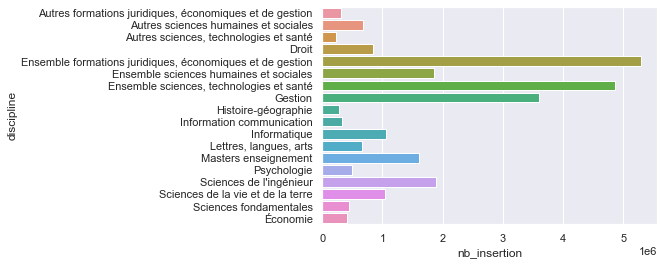

In [199]:
# Répartition du nombre d'insérés par discipline
df_g =df.groupby(['discipline']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_insertion', ylabel='domaine'>

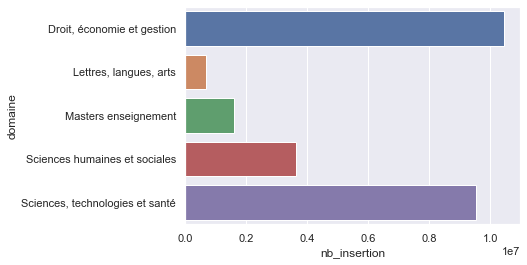

In [201]:
df_g =df.groupby(['domaine']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="domaine", data=df_g)

<AxesSubplot:xlabel='nb_insertion', ylabel='cle_etab'>

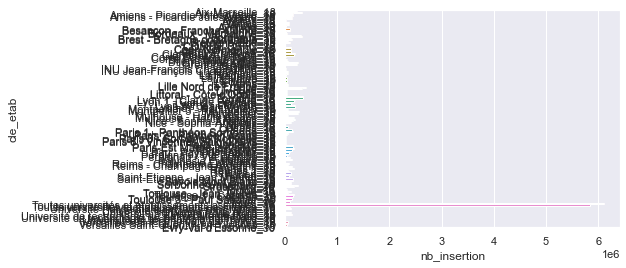

In [202]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="cle_etab", data=df_g)

In [222]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
df_g

,cle_etab,taux_dinsertion,nombre_de_reponses,femmes,nb_insertion,nb_femmes
0,Aix-Marseille_18,1732.0,2587.0,1006.0,227064.0,138389.0
1,Aix-Marseille_30,2034.0,3756.0,1165.0,333710.0,201404.0
2,Amiens - Picardie Jules-Verne_18,1666.0,1716.0,1000.0,152522.0,90916.0
3,Amiens - Picardie Jules-Verne_30,1635.0,1657.0,891.0,152209.0,84645.0
4,Angers_18,1268.0,1565.0,783.0,139472.0,90285.0
...,...,...,...,...,...,...
137,Université de technologie de Troyes_30,0.0,20.0,0.0,0.0,0.0
138,Versailles Saint-Quentin-en-Yvelines_18,728.0,699.0,512.0,60773.0,45316.0
139,Versailles Saint-Quentin-en-Yvelines_30,704.0,678.0,517.0,57288.0,43844.0
140,Évry-Val d'Essonne_18,546.0,375.0,336.0,34651.0,23446.0


In [220]:
#import pandas as pd
#pd.crosstab(df.cle_etab, df.nb_insertion).apply(lambda r: r/len(df), axis=1)

#freq = df.groupby(['cle_etab']).sum('nb_insertion').sort_values
#print(freq)

# Caractéristiques des sortants et caractéristiques des sortants insérés

## Par sexe

In [207]:
#création variable nombre de femmes
df[df['femmes'] == 'ns'] = np.nan
df[df['femmes'] == 'nd'] = np.nan

df["femmes"] = df["femmes"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_femmes']= df["femmes"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_femmes', ylabel='discipline'>

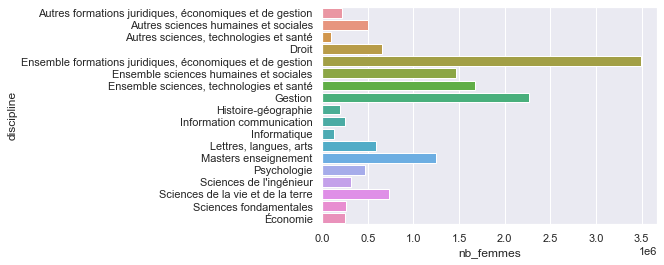

In [208]:
# Répartition du nombre de femmes diplomées par discipline
df_g =df.groupby(['discipline']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_femmes', ylabel='domaine'>

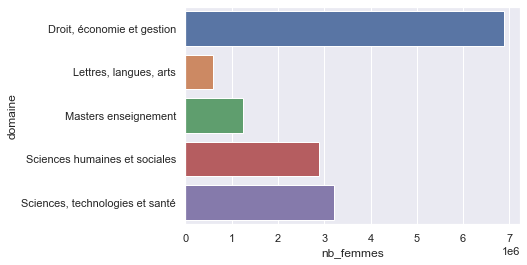

In [209]:
df_g =df.groupby(['domaine']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="domaine", data=df_g)

In [226]:
# Représentation Proportion des femmes insérées selon l'établissement???
df['nb_femmes_inserees']= df["nb_femmes"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_femmes_inserees')
#df_g1.reset_index(inplace = True)
df_g1

,taux_dinsertion,nombre_de_reponses,femmes,nb_insertion,nb_femmes,nb_femmes_inserees
cle_etab,,,,,,
Aix-Marseille_18,1732.0,2587.0,1006.0,227064.0,138389.0,11.778862
Aix-Marseille_30,2034.0,3756.0,1165.0,333710.0,201404.0,13.296297
Amiens - Picardie Jules-Verne_18,1666.0,1716.0,1000.0,152522.0,90916.0,11.577243
Amiens - Picardie Jules-Verne_30,1635.0,1657.0,891.0,152209.0,84645.0,9.913666
Angers_18,1268.0,1565.0,783.0,139472.0,90285.0,8.668913
...,...,...,...,...,...,...
Université de technologie de Troyes_30,0.0,20.0,0.0,0.0,0.0,0.000000
Versailles Saint-Quentin-en-Yvelines_18,728.0,699.0,512.0,60773.0,45316.0,5.640502
Versailles Saint-Quentin-en-Yvelines_30,704.0,678.0,517.0,57288.0,43844.0,5.888665


<AxesSubplot:xlabel='nb_femmes_inserees', ylabel='discipline'>

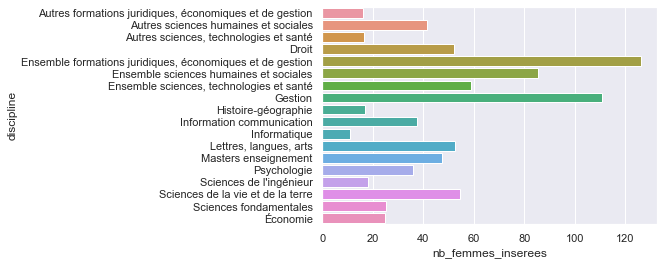

In [232]:
# Répartition proportion de femmes insérées par discipline
df_g2 =df.groupby(['discipline']).sum('nb_femmes_inserees')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_femmes_inserees", y="discipline", data=df_g2)

## Par nombre de boursiers

In [233]:
#création variable nombre de diplomés boursiers
df[df['de_diplomes_boursiers'] == 'ns'] = np.nan
df[df['de_diplomes_boursiers'] == 'nd'] = np.nan

df["de_diplomes_boursiers"] = df["de_diplomes_boursiers"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_de_diplomes_boursiers']= df["de_diplomes_boursiers"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_de_diplomes_boursiers', ylabel='discipline'>

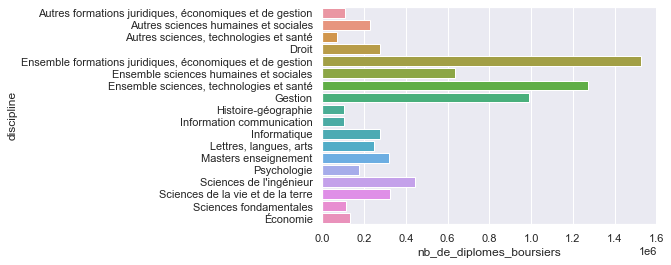

In [234]:
# nb de diplomés boursiers /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_de_diplomes_boursiers', ylabel='domaine'>

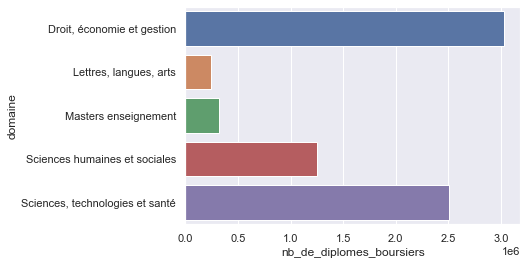

In [235]:
df_g =df.groupby(['domaine']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="domaine", data=df_g)

In [236]:
# Représentation Proportion de boursiers insérés selon l'établissement???
df['nb_boursiers_inseres']= df["nb_de_diplomes_boursiers"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_boursiers_inseres')
#df_g1.reset_index(inplace = True)
df_g1

,taux_dinsertion,de_diplomes_boursiers,nombre_de_reponses,femmes,nb_insertion,nb_femmes,nb_femmes_inserees,nb_de_diplomes_boursiers,nb_boursiers_inseres
cle_etab,,,,,,,,,
Aix-Marseille_18,1732.0,572.0,2587.0,1006.0,227064.0,138389.0,11.778862,76786.0,6.629835
Aix-Marseille_30,2034.0,674.0,3756.0,1165.0,333710.0,201404.0,13.296297,116532.0,7.652022
Amiens - Picardie Jules-Verne_18,1666.0,517.0,1716.0,1000.0,152522.0,90916.0,11.577243,44872.0,5.941596
Amiens - Picardie Jules-Verne_30,1635.0,485.0,1657.0,891.0,152209.0,84645.0,9.913666,42984.0,5.359609
Angers_18,1268.0,530.0,1565.0,783.0,139472.0,90285.0,8.668913,55225.0,5.416824
...,...,...,...,...,...,...,...,...,...
Université de technologie de Troyes_30,0.0,0.0,20.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Versailles Saint-Quentin-en-Yvelines_18,728.0,46.0,699.0,512.0,60773.0,45316.0,5.640502,4676.0,0.518317
Versailles Saint-Quentin-en-Yvelines_30,704.0,46.0,678.0,517.0,57288.0,43844.0,5.888665,4508.0,0.536590


<AxesSubplot:xlabel='nb_boursiers_inseres', ylabel='discipline'>

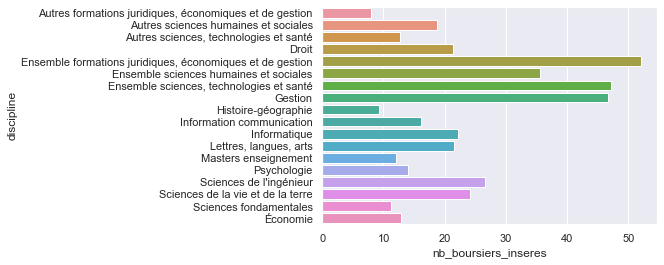

In [237]:
# Répartition proportion de boursiers insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_boursiers_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_boursiers_inseres", y="discipline", data=df_g2)

## Par nombre d'emplois stables

In [238]:
#création variable nombre d'emplois stables
df[df['emplois_stables'] == 'ns'] = np.nan
df[df['emplois_stables'] == 'nd'] = np.nan

df["emplois_stables"] = df["emplois_stables"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_emplois_stables']= df["emplois_stables"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_emplois_stables', ylabel='discipline'>

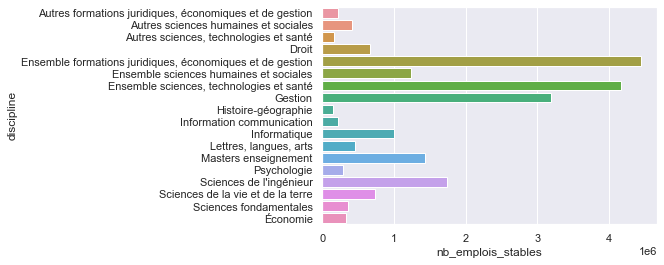

In [239]:
# nb de emplois stables /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_emplois_stables', ylabel='domaine'>

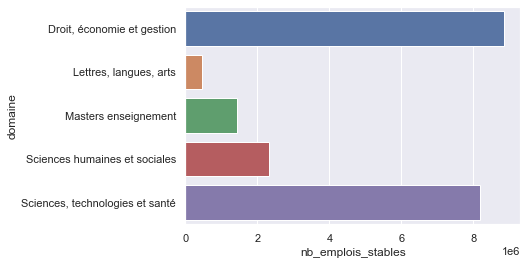

In [240]:
df_g =df.groupby(['domaine']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="domaine", data=df_g)

In [241]:
# Représentation Proportion de emplois stables des insérés selon l'établissement???
df['nb_emplois_stables_inseres']= df["nb_emplois_stables"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_emplois_stables_inseres')
#df_g1.reset_index(inplace = True)
df_g1

,taux_dinsertion,emplois_stables,de_diplomes_boursiers,nombre_de_reponses,femmes,nb_insertion,nb_femmes,nb_femmes_inserees,nb_de_diplomes_boursiers,nb_boursiers_inseres,nb_emplois_stables,nb_emplois_stables_inseres
cle_etab,,,,,,,,,,,,
Aix-Marseille_18,1484.0,1208.0,494.0,2480.0,874.0,218297.0,133696.0,10.176336,74024.0,5.682868,173271.0,13.790649
Aix-Marseille_30,2034.0,1838.0,674.0,3756.0,1165.0,333710.0,201404.0,13.296297,116532.0,7.652022,300387.0,20.757970
Amiens - Picardie Jules-Verne_18,1419.0,1157.0,443.0,1616.0,824.0,144294.0,84978.0,9.431396,42387.0,5.042092,122253.0,12.993561
Amiens - Picardie Jules-Verne_30,1467.0,1401.0,432.0,1588.0,753.0,146414.0,79885.0,8.270860,41150.0,4.727008,139314.0,15.291443
Angers_18,1183.0,819.0,503.0,1531.0,723.0,136582.0,88245.0,7.963031,54307.0,5.099177,101493.0,9.017339
...,...,...,...,...,...,...,...,...,...,...,...,...
Université de technologie de Troyes_30,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
Versailles Saint-Quentin-en-Yvelines_18,641.0,502.0,38.0,667.0,466.0,57989.0,43844.0,5.111766,4420.0,0.426363,46840.0,5.478686
Versailles Saint-Quentin-en-Yvelines_30,623.0,574.0,38.0,646.0,471.0,54696.0,42372.0,5.320764,4252.0,0.437824,50980.0,6.447037


<AxesSubplot:xlabel='nb_emplois_stables_inseres', ylabel='discipline'>

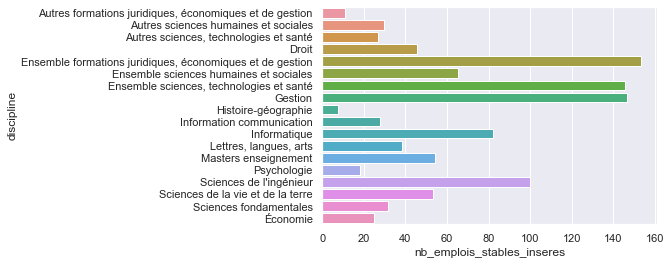

In [242]:
# Répartition proportion de emplois stables des insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_emplois_stables_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables_inseres", y="discipline", data=df_g2)

## Selon le salaire

In [243]:
#création variable salaires bruts annuels estimés
df[df['salaire_brut_annuel_estime'] == 'ns'] = np.nan
df[df['salaire_brut_annuel_estime'] == 'nd'] = np.nan

df["salaire_brut_annuel_estime"] = df["salaire_brut_annuel_estime"].astype('float64')

<AxesSubplot:xlabel='salaire_brut_annuel_estime', ylabel='discipline'>

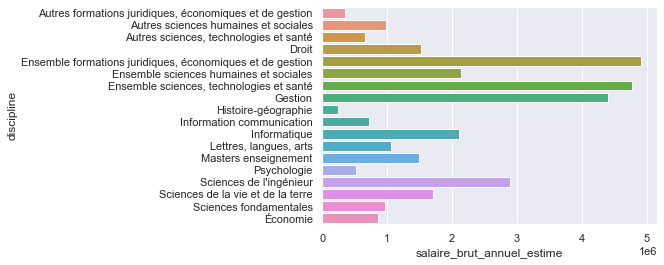

In [244]:
# Répartition des salaires bruts annuels /discipline
df_g =df.groupby(['discipline']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="discipline", data=df_g)

<AxesSubplot:xlabel='salaire_brut_annuel_estime', ylabel='domaine'>

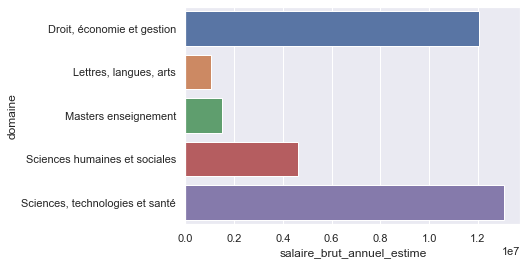

In [245]:
df_g =df.groupby(['domaine']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="domaine", data=df_g)

In [246]:
# Représentation de salaires bruts annuels selon l'établissement???
df_g1 =df.groupby(['cle_etab']).sum('salaire_brut_annuel_estime')
#df_g1.reset_index(inplace = True)
df_g1

,salaire_brut_annuel_estime,taux_dinsertion,emplois_stables,de_diplomes_boursiers,nombre_de_reponses,femmes,nb_insertion,nb_femmes,nb_femmes_inserees,nb_de_diplomes_boursiers,nb_boursiers_inseres,nb_emplois_stables,nb_emplois_stables_inseres
cle_etab,,,,,,,,,,,,,
Aix-Marseille_18,449500.0,1400.0,1126.0,472.0,2429.0,819.0,214013.0,130891.0,9.521575,72902.0,5.420964,169089.0,12.814459
Aix-Marseille_30,623400.0,1860.0,1703.0,618.0,3679.0,1045.0,327011.0,196826.0,11.916986,114394.0,7.008344,295185.0,19.206246
Amiens - Picardie Jules-Verne_18,392100.0,1227.0,1012.0,379.0,1544.0,686.0,137384.0,79986.0,7.991136,40083.0,4.375353,117038.0,11.483523
Amiens - Picardie Jules-Verne_30,426300.0,1280.0,1230.0,379.0,1520.0,634.0,140095.0,75710.0,6.959825,39315.0,4.149192,133491.0,13.451443
Angers_18,250300.0,913.0,651.0,380.0,1419.0,527.0,126537.0,81171.0,5.798943,49715.0,3.731068,95143.0,7.144843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Université de technologie de Troyes_30,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
Versailles Saint-Quentin-en-Yvelines_18,160500.0,447.0,342.0,34.0,591.0,322.0,50617.0,38372.0,3.627230,4268.0,0.385126,40760.0,3.829201
Versailles Saint-Quentin-en-Yvelines_30,188900.0,533.0,506.0,36.0,604.0,434.0,50916.0,40818.0,4.909653,4168.0,0.415602,48124.0,5.691482


# BROUILLON

In [ ]:
columns_names = pd.json_normalize(req.json()['facet_groups'][:])

In [ ]:
columns_names = list(ses_2020.columns)
columns_names1 = [c.replace('fields.', '') for c in columns_names ]

In [ ]:
dic=dict()
for i in range(len(columns_names)) :
    dic[columns_names[i]] = columns_names1[i]
ses_2020.rename(dic)